In [1]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import mannwhitneyu, kruskal
import numpy as np

In [2]:
df=pd.read_csv('../csv/dataset_ml.csv')
df=df.drop('id_advert',axis=1)

## Analyses Bivariées

Certains tests statistiques seront exclus dans notre étude comme le test de Pearson dans les analyses de corrélation, le test de Student (t-test) et le test ANOVA dans les analyses d'association. En effet, il a été demontré précédemment avec le test de Shapiro que toutes les variables quantitatives concernées ne sont pas normalement distribuées.

On se tournera donc vers d'autres tests:

- les tests de corrélation de Spearman et de Kendall
- le test de Mann-Whitney (scam a deux modalités)
- le test de Chi-carré, et le coefficient de Cramer-V

### 1.Variable cible 

#### 1.A.Variables quantitatives & variables catégorielles sous format numérique

##### Corrélation Spearman & Kendall

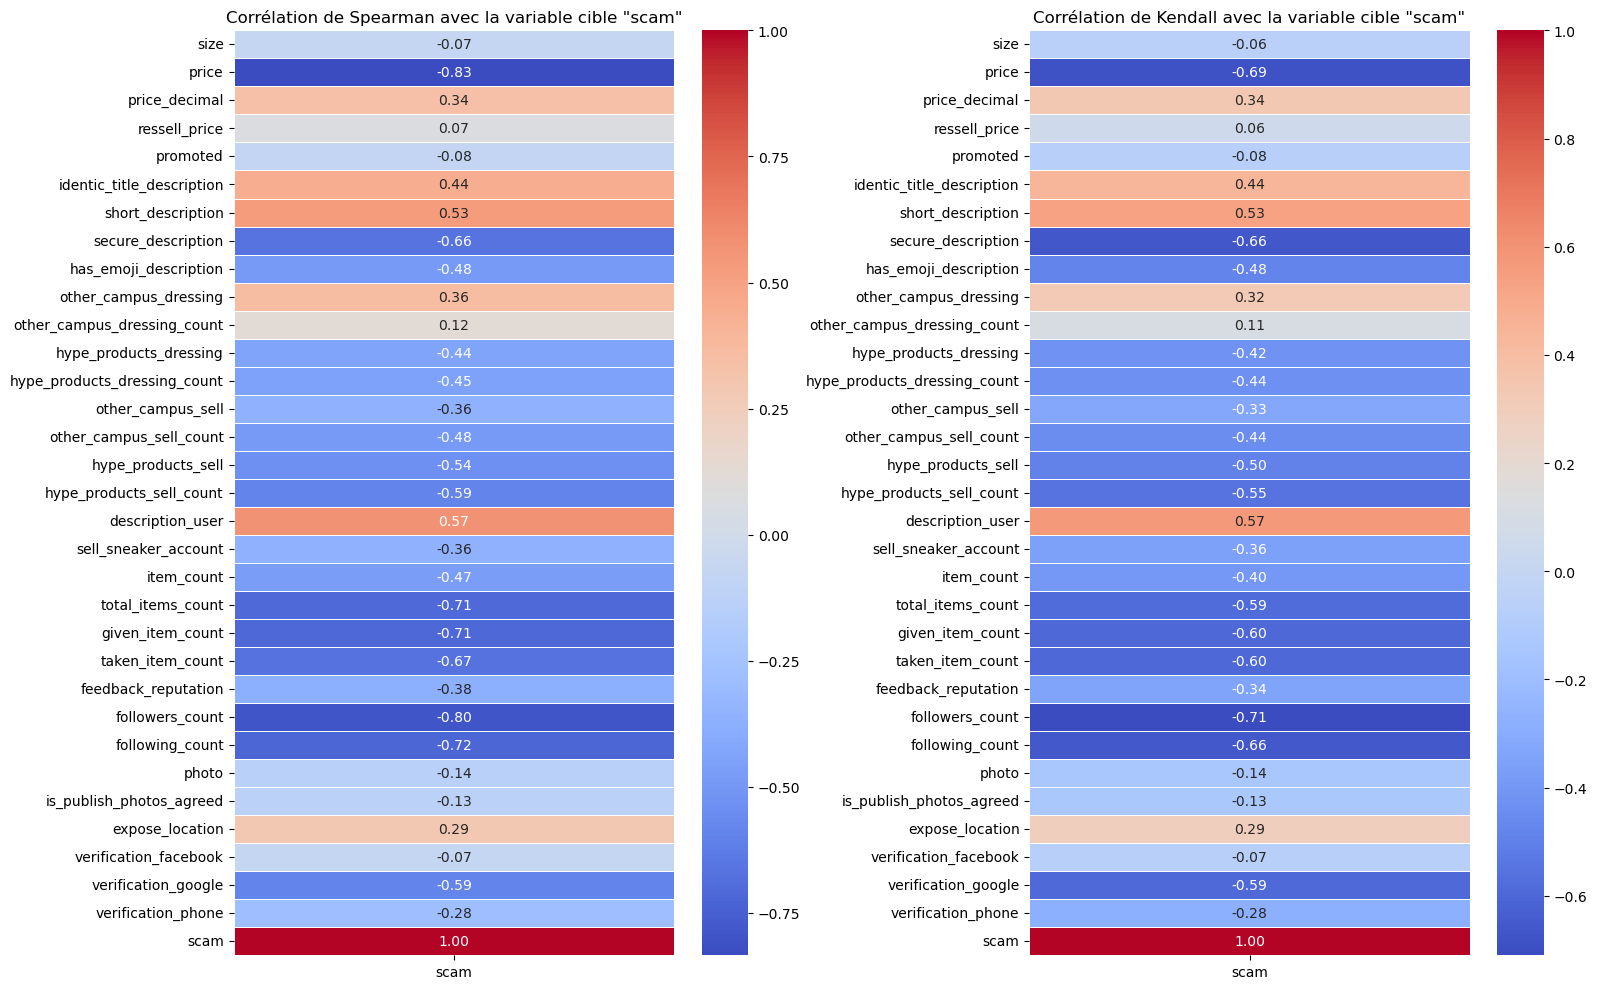

In [4]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix_spearman, _ = spearmanr(numeric_columns)
correlation_scam = correlation_matrix_spearman[numeric_columns.columns == 'scam']


correlation_matrix_kendall = numeric_columns.corr(method='kendall')
correlation_scam_kendall = correlation_matrix_kendall.loc[['scam']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.heatmap(correlation_scam.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['scam'], yticklabels=numeric_columns.columns, ax=axes[0])
axes[0].set_title('Corrélation de Spearman avec la variable cible "scam"')


sns.heatmap(correlation_scam_kendall.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['scam'], yticklabels=numeric_columns.columns, ax=axes[1])
axes[1].set_title('Corrélation de Kendall avec la variable cible "scam"')
plt.tight_layout()
plt.show()

On retrouve des liens forts entre la variable cible (scam) et les variables price, secure_description,total_items_count ou encore followers_count:

- Price :

En effet, généralement, les contrefaçons sont moins chères que le prix de vente de la paire authentique, surtout lors de la revente. Ce coefficient de -0.83 reflète cette tendance : plus le prix est bas, plus la variable cible (scam) a la valeur 1, indiquant une annonce frauduleuse. À l'inverse, des prix plus élevés sont associés à la variable cible ayant la valeur 0, indiquant une annonce authentique.

- Secure Description :

Une corrélation significative a été observée entre la variable cible (scam) et la présence d'une description sécurisée (secure_description). En général, les annonces authentiques ont tendance à inclure des descriptions utilisant un vocabulaire inspirant confiance (mention de facture, authenticité) et lié à l'univers des sneakers (double emballage, envoi sécurisé). Le coefficient de corrélation de -0.66 indique que les annonces frauduleuses (scam = 1) sont associées à des descriptions moins sécurisées (valeur 0).

- Followers Count :

Une corrélation a été identifiée entre la variable cible (scam) et le nombre d'abonnés de l'annonceur (Followers Count). En général, les annonceurs d'annonces authentiques ont tendance à avoir un nombre élevé d'abonnés en raison de leur réputation de vendre des articles authentiques et de la confiance qu'ils ont gagnée. En revanche, les comptes frauduleux, peu appréciés et éphémères sur la plateforme, ont un faible nombre d'abonnés. Le coefficient de corrélation suggère que les annonces authentiques sont associées à un nombre élevé d'abonnés, représenté par la valeur 0 de la variable cible.

- Given Item Count :

La corrélation entre la variable cible (scam) et le nombre d'articles vendus (given_item_count) est également notable. Un vendeur qui a vendu un grand nombre d'articles sans problème bénéficie d'une meilleure réputation et de la confiance des utilisateurs. Cela fonctionne comme un indicateur de confiance. Le coefficient de corrélation de -0.71 suggère qu'un nombre élevé d'articles vendus est associé à une valeur de 0 pour la variable cible, indiquant une annonce authentique.

En outre, bon nombre des principes mentionnés peuvent également être appliqués à d'autres variables qui opèrent de manière similaire, telles que short_description, has_emoji_description, following_count, feedback_reputation, ou encore followers_count.

##### Test de Mann whitney

##### other_campus_dressing_count

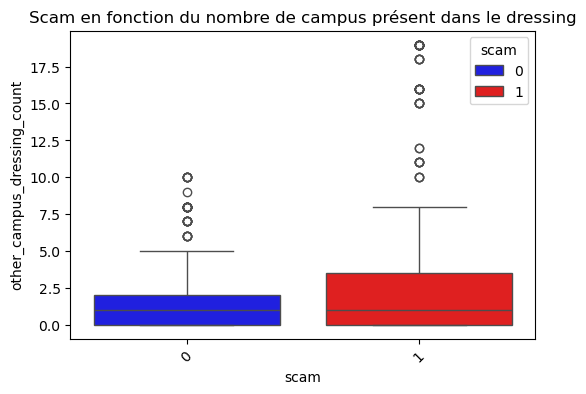

In [5]:
# Graphique de la variable cible en fonction de other_campus_dressing
plt.figure(figsize=(6, 4))
sns.boxplot(x='scam', y='other_campus_dressing_count', data=df, hue='scam', palette={0: 'blue', 1: 'red'})
plt.xticks(rotation=45)
plt.title('Scam en fonction du nombre de campus présent dans le dressing')
plt.show()

In [6]:
ptypes = df['scam'].unique()
data1 = [df[df['scam'] == ptype]['other_campus_dressing_count'] for ptype in ptypes]
statistic1, pvalue1 = mannwhitneyu(*data1)
print('Statistique du test de Mann-Whitney / scam -> other_campus_dressing_count: ',statistic1, ' p-value :', pvalue1)

Statistique du test de Mann-Whitney / scam -> other_campus_dressing_count:  84701.5  p-value : 0.0008047025277211697


La P-value est inférieure à 0.05 : au moins une des distributions de scam est différente des autres.

Par contre, ce test n'identifie pas où cette dominance se produit ni pour combien de paires de groupes la dominance s'obtient.

##### hype_products_sell_count

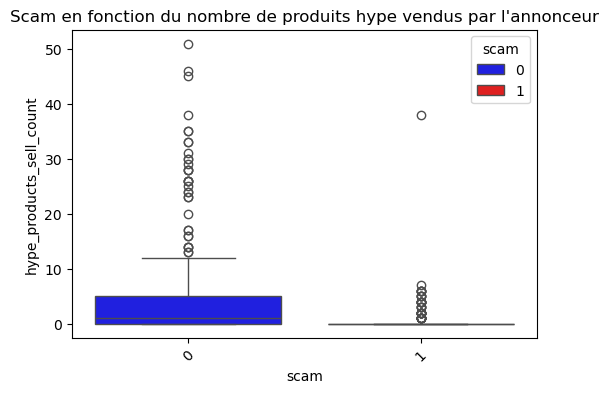

In [7]:
# Graphique de la variable cible en fonction de other_campus_dressing
plt.figure(figsize=(6, 4))
sns.boxplot(x='scam', y='hype_products_sell_count', data=df, hue='scam', palette={0: 'blue', 1: 'red'})
plt.xticks(rotation=45)
plt.title('Scam en fonction du nombre de produits hype vendus par l\'annonceur')
plt.show()

In [8]:
ptypes = df['scam'].unique()
data1 = [df[df['scam'] == ptype]['hype_products_sell_count'] for ptype in ptypes]
statistic1, pvalue1 = mannwhitneyu(*data1)
print('Statistique du test de Mann-Whitney / scam -> hype_products_sell_count: ',statistic1, ' p-value :', pvalue1)

Statistique du test de Mann-Whitney / scam -> hype_products_sell_count:  30872.0  p-value : 7.81218541635918e-62


La P-value est inférieure à 0.05 : au moins une des distributions de scam est différente des autres.

Par contre, ce test n'identifie pas où cette dominance se produit ni pour combien de paires de groupes la dominance s'obtient.

#### 1.B.Variables catégorielles

##### Brand

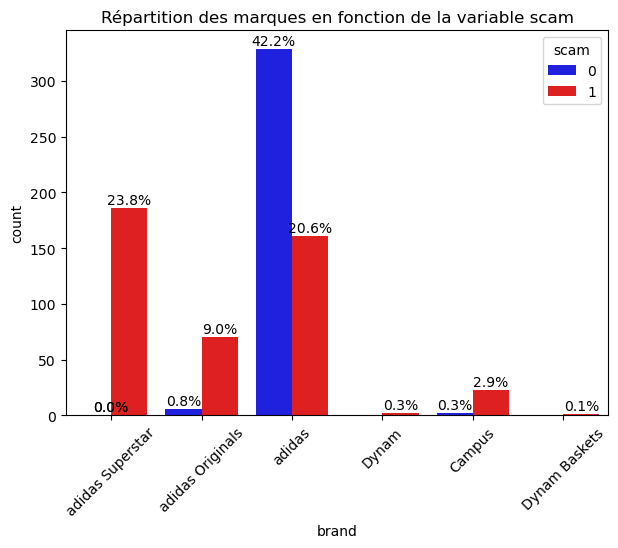

In [9]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="brand", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des marques en fonction de la variable scam")

total = len(df["brand"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.show()

In [10]:
ct = pd.crosstab(df['brand'], df['scam'])
chi2_stat, p_value, dof, expected_freq = chi2_contingency(ct)

print("Statistique du test de chi-carré :", chi2_stat)
print("p_value :", p_value)
print("Degrés de liberté :", dof)

Statistique du test de chi-carré : 309.4444639910256
p_value : 9.330068848524752e-65
Degrés de liberté : 5


La P-value est inférieure à 0.05 : il y a une association entre les deux variables.

Par contre, il faut calculer le coefficient de Cramer-V pour mesurer la force d'association.

In [11]:
# Coefficient de Cramer-V
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramer_v = np.sqrt(chi2_stat/(n*min_dim))

# Afficher du résultat
print("Coefficient de Cramer-V :", cramer_v.round(3))

Coefficient de Cramer-V : 0.63


La valeur de Cramer-V est de 0.63, il s'agit d'une association forte entre les deux variables.

En effet, étant donné que ce modèle est associé à la marque Adidas, la mention d'une autre marque par un annonceur peut susciter des doutes quant à l'authenticité de l'annonce. Ce qui peut expliquer cette forte association.

##### Modele

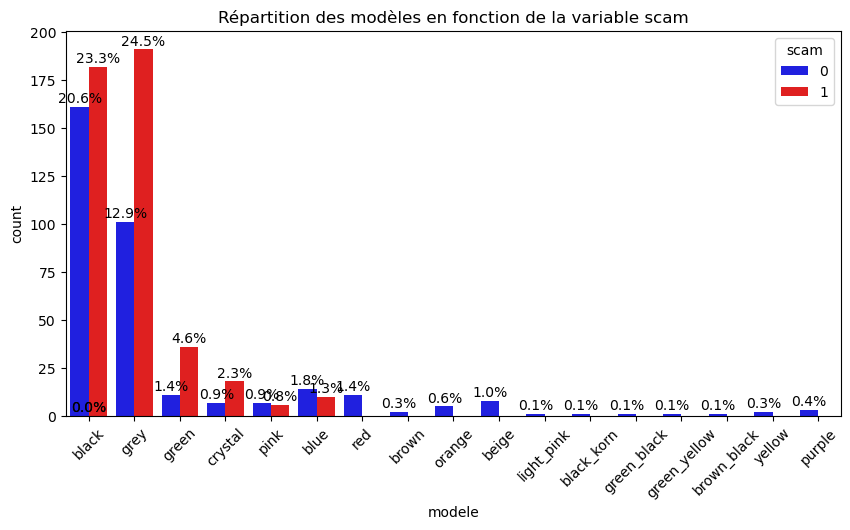

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="modele", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des modèles en fonction de la variable scam")

total = len(df["modele"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.show()

In [13]:
ct = pd.crosstab(df['modele'], df['scam'])
chi2_stat, p_value, dof, expected_freq = chi2_contingency(ct)

print("Statistique du test de chi-carré :", chi2_stat)
print("p_value :", p_value)
print("Degrés de liberté :", dof)

Statistique du test de chi-carré : 70.80949189571366
p_value : 7.196481574545722e-09
Degrés de liberté : 16


In [14]:
# Coefficient de Cramer-V
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramer_v = np.sqrt(chi2_stat/(n*min_dim))

# Afficher du résultat
print("Coefficient de Cramer-V :", cramer_v.round(3))

Coefficient de Cramer-V : 0.301


La valeur de Cramer-V est inférieure à 0.6
L'association entre les deux variables est modérée.

Les modèles les plus fréquemment reproduits sont également parmi les modèles les plus recherchés et vendus sur la plateforme. Ainsi, pour un modèle donné, il peut y avoir à la fois des annonces authentiques et frauduleuses, car la popularité de certains modèles attire l'attention tant des vendeurs légitimes que des fraudeurs. Ce qui peut expliquer cette asociation modérée.

##### Country

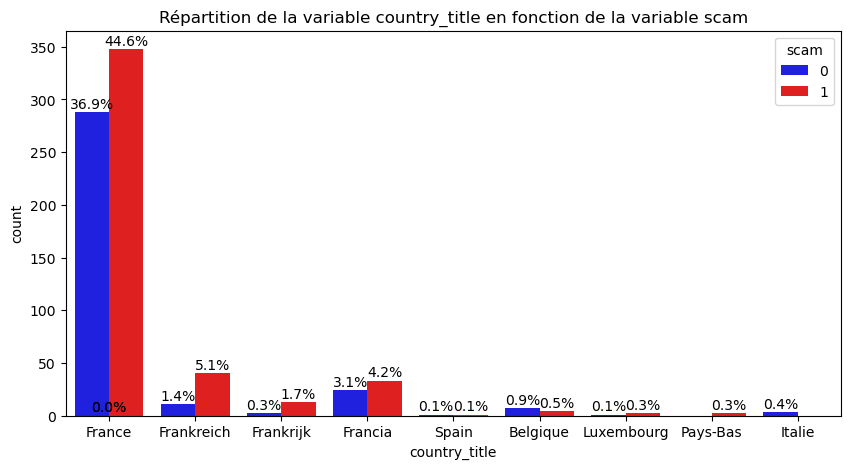

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="country_title", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable country_title en fonction de la variable scam")

total = len(df["country_title"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [16]:
ct = pd.crosstab(df['country_title'], df['scam'])
chi2_stat, p_value, dof, expected_freq = chi2_contingency(ct)

print("Statistique du test de chi-carré :", chi2_stat)
print("p_value :", p_value)
print("Degrés de liberté :", dof)

Statistique du test de chi-carré : 23.824676501359352
p_value : 0.002452120126167305
Degrés de liberté : 8


La P-value est inférieure à 0.05 : il y a une association entre les deux variables.

Par contre, il faut calculer le coefficient de Cramer-V pour mesurer la force d'association.

In [17]:
# Coefficient de Cramer-V
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramer_v = np.sqrt(chi2_stat/(n*min_dim))

# Afficher du résultat
print("Coefficient de Cramer-V :", cramer_v.round(3))

Coefficient de Cramer-V : 0.175


La valeur de Cramer-V est inférieure à 0.6
L'association entre les deux variables est faible.

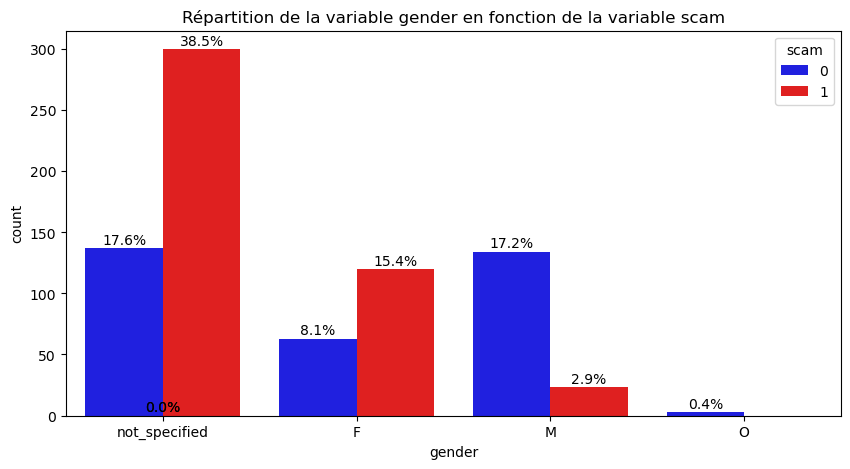

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="gender", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable gender en fonction de la variable scam")

total = len(df["gender"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [19]:
ct = pd.crosstab(df['gender'], df['scam'])
chi2_stat, p_value, dof, expected_freq = chi2_contingency(ct)

print("Statistique du test de chi-carré :", chi2_stat)
print("p_value :", p_value)
print("Degrés de liberté :", dof)

Statistique du test de chi-carré : 148.36533189122306
p_value : 5.934470372041686e-32
Degrés de liberté : 3


La P-value est inférieure à 0.05 : il y a une association entre les deux variables.

Par contre, il faut calculer le coefficient de Cramer-V pour mesurer la force d'association.

In [20]:
# Coefficient de Cramer-V
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramer_v = np.sqrt(chi2_stat/(n*min_dim))

# Afficher du résultat
print("Coefficient de Cramer-V :", cramer_v.round(3))

Coefficient de Cramer-V : 0.436


La valeur de Cramer-V est inférieure à 0.6
L'association entre les deux variables est faible.

### 2.Variables Explicatives

#### Matrices de Spearman & Kendall globales

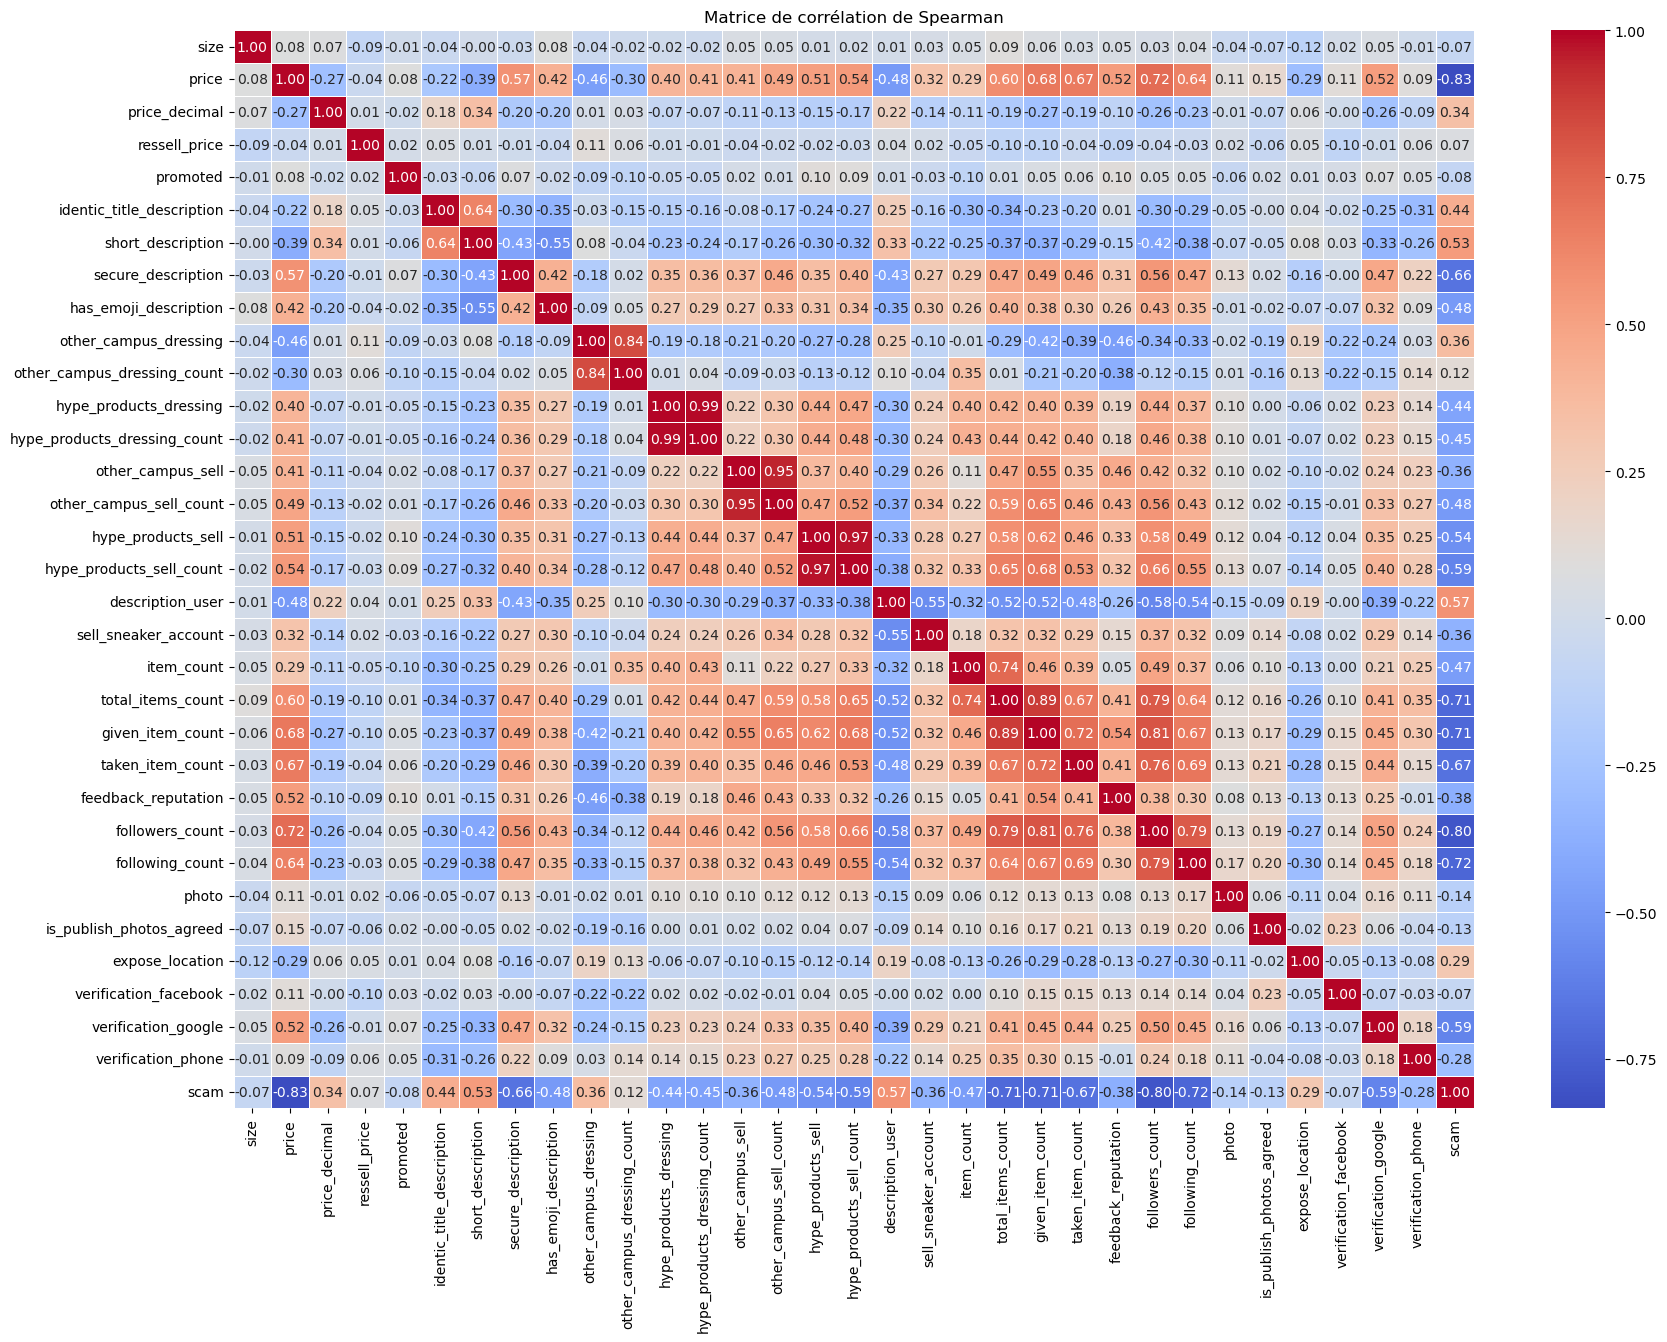

In [21]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix_spearman, _ = spearmanr(numeric_columns)

plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=numeric_columns.columns, yticklabels=numeric_columns.columns)
plt.title('Matrice de corrélation de Spearman')
plt.show()

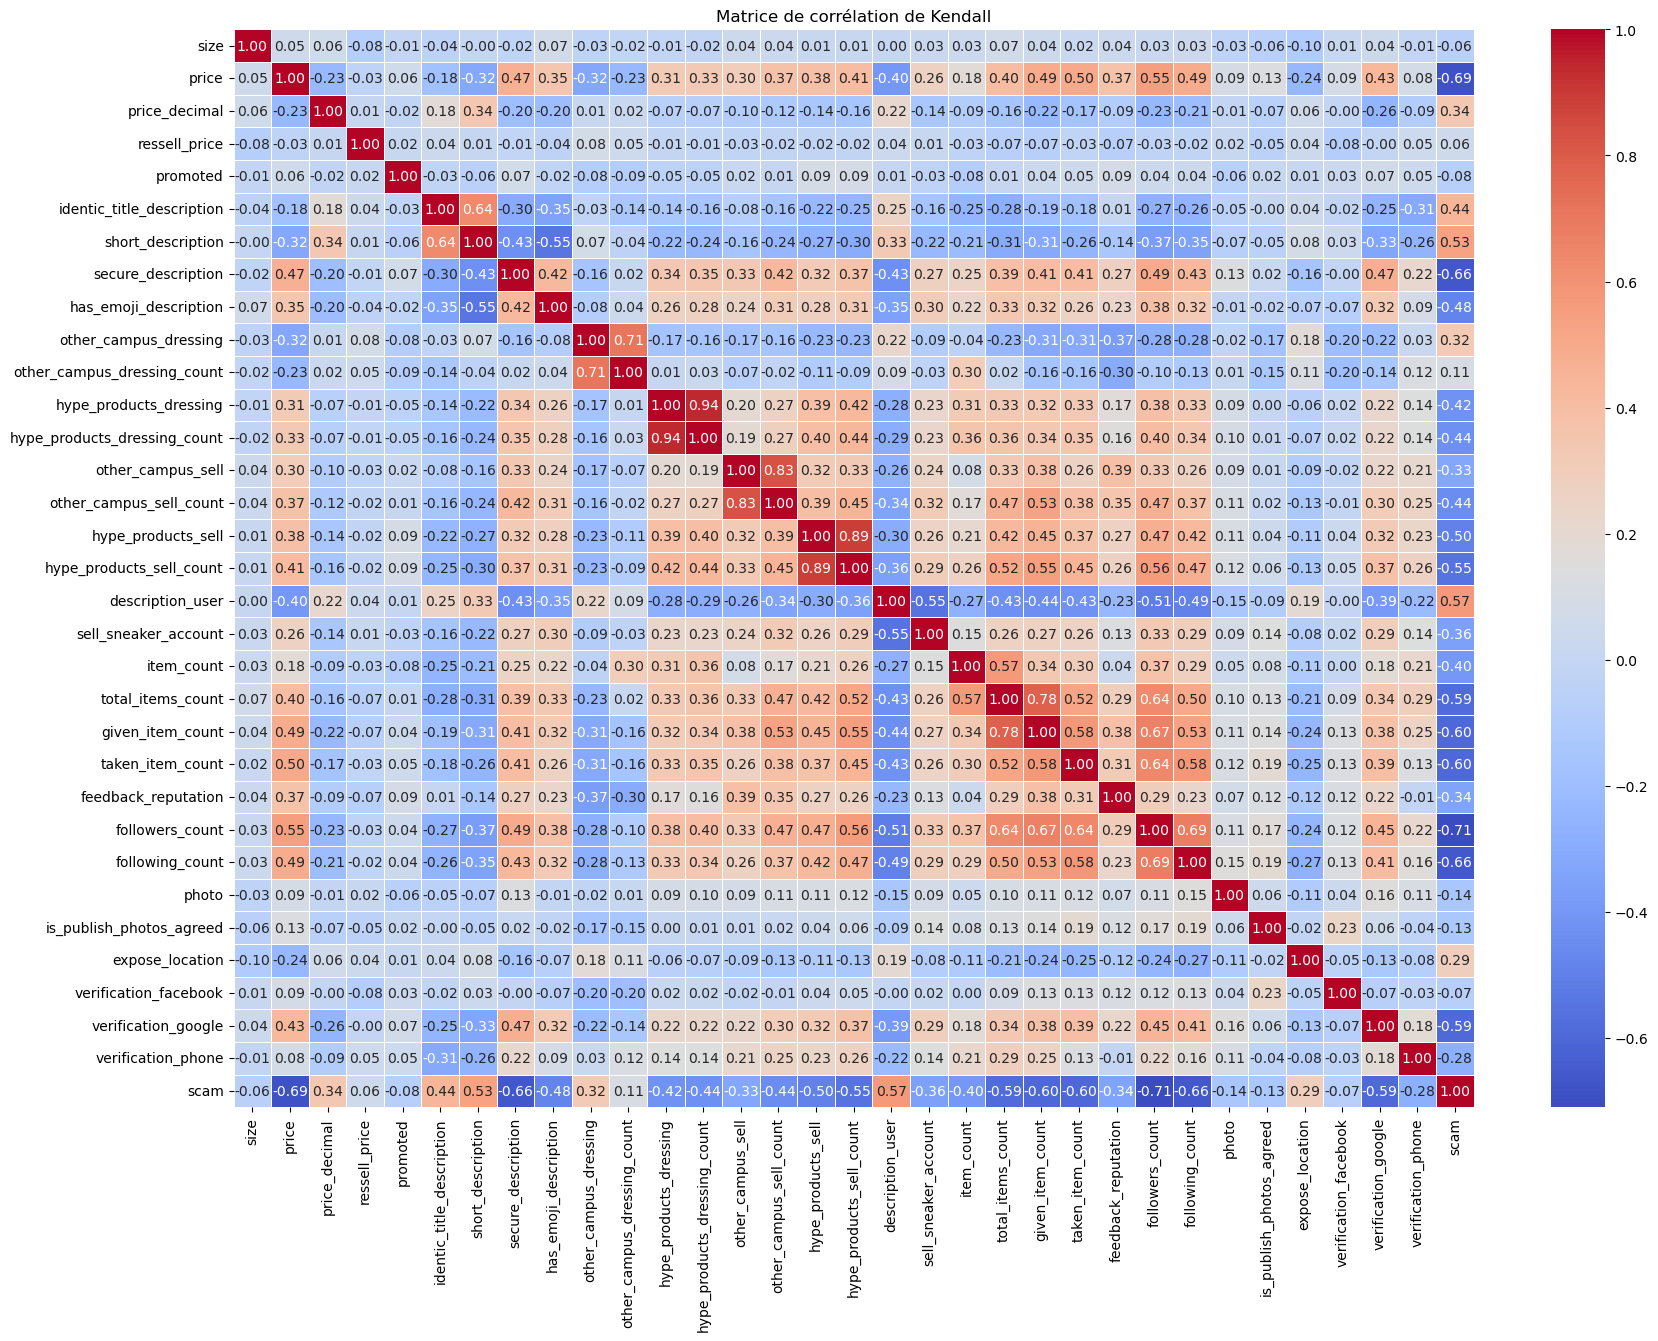

In [22]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix_kendall = numeric_columns.corr(method='kendall')

plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=correlation_matrix_kendall.columns, yticklabels=correlation_matrix_kendall.columns)
plt.title('Matrice de corrélation de Kendall')
plt.show()


De nombreuses variables présentent des coefficients de corrélation élevés, car elles capturent essentiellement la même information. Par exemple, prenons les variables "other_campus_sell" et "other_campus_sell_count" ; la première représente le nombre total de campus déjà vendus par l'annonceur, tandis que la seconde représente le pourcentage de campus déjà vendus parmi l'ensemble de ses ventes. Nous opterons pour la variable qui donne de meilleurs résultats lors de la phase d'entraînement.
Un phénomène similaire se produit avec les variables "other_campus_dressing" et "hype_products_sell".

De nombreuses variables fortement liées à la variable cible "scam" présentent également une corrélation marquée avec le prix. En effet, "scam" et le prix ont des comportements assez similaires : plus le prix est bas, plus il a de chances d'être associé à une annonce frauduleuse.

Nous observons également des variables qui fonctionnent de manière similaire. Par exemple, un compte avec un grand nombre de followers a potentiellement beaucoup de personnes suivies. De même, l'historique du nombre d'articles publiés par l'annonceur est logiquement lié au nombre d'articles vendus. Ainsi, les variables "total_items_count" et "given_item_count" présentent une corrélation significative.

Cela souligne l'importance de l'analyse des corrélations dans la sélection des caractéristiques pour le modèle, en évitant la redondance et en choisissant les variables les plus informatives.

### 3.Annexe

Les tests de corrélation à utiliser sont les suivants :

- Corrélation de Spearman

Hypothèses :

H0 : Il n'y a pas de corrélation *monotone* entre les deux variables.

H1 : Il y a une corrélation monotone entre les deux variables.

Conditions d'utilisation :

Les deux variables sont quantitatives ou *ordinales*.
Les données n'ont pas besoin d'être normalement distribuées.
La relation entre les variables peut être monotone (linéaire ou non linéaire).

Interprétation : Le coefficient de corrélation de Spearman varie entre -1 et 1.

Si le coefficient est proche de 1 (un seuil à 60%), il y a une corrélation positive entre les variables.
Si le coefficient est proche de -1 (un seuil à 60%), il y a une corrélation négative entre les variables.
Si le coefficient est proche de 0, il n'y a pas de *corrélation monotone (linéaire ou non linéaire) entre les variables*.

- Corrélation de Kendall

Hypothèses :

H0 : Il n'y a pas de *corrélation monotone* entre les deux variables.

H1 : Il y a une corrélation monotone entre les deux variables.

Conditions d'utilisation :

Les deux variables sont quantitatives ou ordinales.
Les données n'ont pas besoin d'être normalement distribuées.
La relation entre les variables peut être monotone (linéaire ou non linéaire).

Interprétation : Le coefficient de corrélation de Kendall varie entre -1 et 1.

Si le coefficient est proche de 1 (un seuil à 70%), il y a une corrélation positive entre les variables.
Si le coefficient est proche de -1 (un seuil à 70%), il y a une corrélation négative entre les variables.
Si le coefficient est proche de 0, il n'y a pas de corrélation monotone entre les variables

Les tests d'association à utiliser sont les suivants :

- Test de Mann-Whitney

Hypothèses

H0 : Les distributions des deux groupes sont égales.

H1 : Les distributions des deux groupes sont différentes.

Conditions d'utilisation

Les observations sont indépendantes.
Les données peuvent être ordonnées (au moins ordinale).

- Test du chi-carré (chi2)

Hypothèses

H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.

H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

Conditions d'utilisation

Les deux variables sont qualitatives (catégoriques).
Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable

- Coefficient de Cramer-V

Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

Conditions d'utilisation

Les deux variables sont qualitatives (catégoriques).
Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.
Interprétation

Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.